In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
df = pd.read_csv("CSE_student_performances.csv")
scaler = StandardScaler()

In [27]:
df.rename(columns={'Age ':'Age'}, inplace=True)
df['Gender'].str.capitalize().value_counts()
df.AcademicPerformance = df['AcademicPerformance'].apply(lambda x: "Good" if x =="Goo" else x)
df.AcademicPerformance.value_counts()
df.AcademicPerformance.astype('category').cat.codes
df.AcademicPerformance.astype('category')
df = df.dropna()
df.loc[:, 'AcademicPerformance']= pd.factorize(df.AcademicPerformance)[0]
df.loc[:, 'Gender']= pd.factorize(df['Gender'].str.capitalize())[0]
df.loc[:, 'LikePresentation'] = pd.factorize(df['LikePresentation'].str.capitalize())[0]
df.loc[:, 'FaceChallangesToCompleteAcademicTask'] = pd.factorize(df['FaceChallangesToCompleteAcademicTask'].str.capitalize())[0]
df.loc[:, 'DepressionStatus'] = pd.factorize(df['DepressionStatus'].str.capitalize())[0]
df.loc[:, 'TakingNoteInClass'] = pd.factorize(df['TakingNoteInClass'].str.capitalize())[0]
df.loc[:, 'LikeNewThings'] = pd.factorize(df['LikeNewThings'].str.capitalize())[0]
df.loc[:,'NumberOfFriend'] = df['NumberOfFriend'].astype(int)
y=df['AcademicPerformance']
X=df.drop('AcademicPerformance',axis=1)

In [28]:
X


,Age,Gender,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
1,23,0,0,0,0,0,8,80.0,0
2,24,0,1,1,1,1,8,10.0,0
3,20,1,2,1,2,1,5,15.0,0
4,24,1,2,0,2,0,5,2.0,0
5,23,0,0,1,0,0,8,12.0,0
...,...,...,...,...,...,...,...,...,...
94,21,0,2,1,2,0,6,4.0,0
95,21,1,2,0,0,0,6,6.0,0
96,25,0,2,1,0,0,4,9.0,1
97,21,0,2,2,1,1,10,23.0,0


In [29]:
from sklearn.cluster import KMeans

scaler=StandardScaler()
scaled_data = scaler.fit_transform(X)
model = None


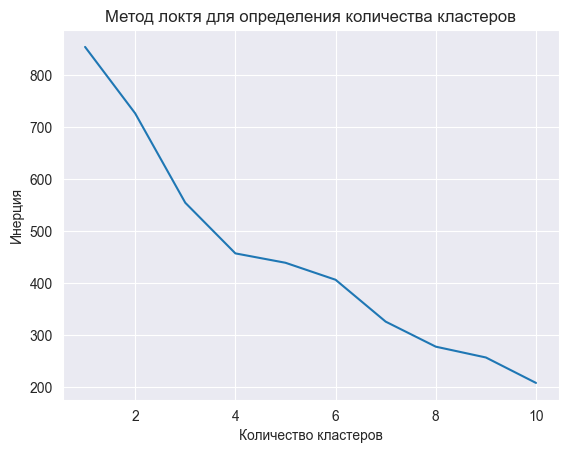

In [30]:
inertia = []
for n_clusters in range(1, 11):
    model = KMeans(n_clusters=n_clusters)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения количества кластеров')
plt.show()

In [31]:
print(model.labels_)

[8 2 6 0 1 4 2 1 4 8 7 5 0 6 0 7 1 4 0 5 4 3 2 9 9 2 5 1 2 9 8 2 6 0 1 4 2
 1 4 8 7 5 0 6 0 7 1 4 0 5 4 3 2 9 9 2 5 1 2 9 8 2 6 0 1 4 2 1 4 8 7 5 0 6
 0 7 1 4 0 5 4 3 2 0 6 0 7 1 4 0 5 4 3 2 4]


In [32]:
print(model.inertia_)

208.25374603843443


In [33]:
model = KMeans(n_clusters=2)
model.fit(scaled_data)

KMeans(n_clusters=2)

In [34]:
print(model.labels_)

[0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0]


In [35]:
print(model.inertia_)

689.2871391860417


Text(0.5, 1.0, 'KMeans')

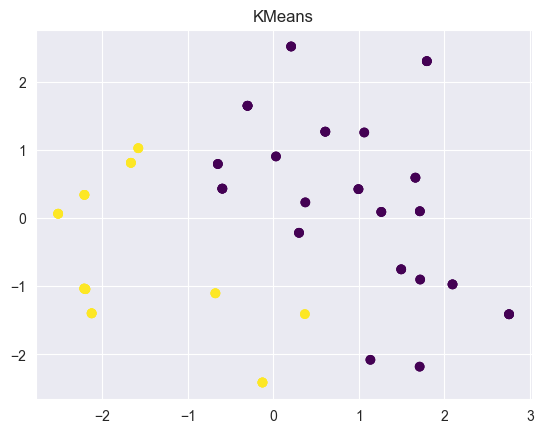

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=model.labels_, cmap='viridis')
plt.title('KMeans')